# Digit Recognizer Model

In [1]:
# Importing Statements
import numpy as np
import pandas as pd
import os
import cv2 as cv
import pickle
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import Model, Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import save_model, load_model

In [2]:
# Loading the Data
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [3]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28), (60000,), (10000, 28, 28), (10000,))

## Data Preprocessing

In [5]:
# Reshaping the Data
X_train = X_train.reshape(-1, 28, 28, 1).astype('float32')
y_train = y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 28, 28, 1).astype('float32')
y_test = y_test.reshape(-1, 1)

# Changing the training labels to categorical
y_train = tf.keras.utils.to_categorical(y_train)
y_test = tf.keras.utils.to_categorical(y_test)

In [6]:
X_train.max(), X_test.max(), y_train.max(), y_test.max()

(255.0, 255.0, 1.0, 1.0)

In [7]:
# Normalizing the Data
X_train = X_train/255.0
X_test = X_test/255.0

In [8]:
X_train.max(), X_test.max()

(1.0, 1.0)

In [9]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((60000, 28, 28, 1), (60000, 10), (10000, 28, 28, 1), (10000, 10))

## Building the Model

In [10]:
model = Sequential([
    # First Convolution Layer
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1), padding='valid', activation='relu', input_shape=(28, 28, 1)),
    BatchNormalization(),
    Conv2D(32, kernel_size=(3, 3), strides=(1, 1),padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    
    # Second Convolution Layer
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1),padding='valid', activation='relu'),
    BatchNormalization(),
    Conv2D(64, kernel_size=(3, 3), strides=(1, 1),padding='valid', activation='relu'),
    BatchNormalization(),
    MaxPool2D(pool_size=(2, 2)),
    Dropout(0.2),
    
#     # Third Convolution Layer
#     Conv2D(128, kernel_size=(3, 3), strides=(1, 1),padding='valid', activation='relu'),
#     BatchNormalization(),
#     Conv2D(128, kernel_size=(3, 3), strides=(1, 1),padding='valid', activation='relu'),
#     BatchNormalization(),
#     MaxPool2D(pool_size=(2, 2)),
#     Dropout(0.2),
    
    # Flattening the output
    Flatten(),
    
    # Connecting Fully Connected Layer
    Dense(128, activation='relu'),
    Dropout(0.2),
    Dense(10, activation='softmax')
])

In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_1 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        1

In [12]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [12]:
# Training the model
history = model.fit(X_train, y_train, epochs=10, 
                    batch_size=100, validation_data=(X_test, y_test), verbose=1)

Epoch 1/10
600/600 [==============================] - 127s 212ms/step - loss: 0.1588 - accuracy: 0.9509 - val_loss: 0.1419 - val_accuracy: 0.9571
Epoch 2/10
600/600 [==============================] - 125s 209ms/step - loss: 0.0577 - accuracy: 0.9823 - val_loss: 0.0315 - val_accuracy: 0.9900
Epoch 3/10
600/600 [==============================] - 126s 209ms/step - loss: 0.0415 - accuracy: 0.9874 - val_loss: 0.0352 - val_accuracy: 0.9900
Epoch 4/10
600/600 [==============================] - 125s 209ms/step - loss: 0.0340 - accuracy: 0.9892 - val_loss: 0.0220 - val_accuracy: 0.9939
Epoch 5/10
600/600 [==============================] - 126s 209ms/step - loss: 0.0305 - accuracy: 0.9909 - val_loss: 0.0215 - val_accuracy: 0.9933
Epoch 6/10
600/600 [==============================] - 128s 213ms/step - loss: 0.0278 - accuracy: 0.9914 - val_loss: 0.0257 - val_accuracy: 0.9927
Epoch 7/10
600/600 [==============================] - 126s 210ms/step - loss: 0.0244 - accuracy: 0.9926 - val_loss: 0.0289 -

## Plotting the Learning Curve

In [13]:
# Plotting the Accuracy curve of the Model
plt.figure()

plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title("Training and Validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend(["Training", "Validation"], loc="lower right")

NameError: name 'history' is not defined

<Figure size 432x288 with 0 Axes>

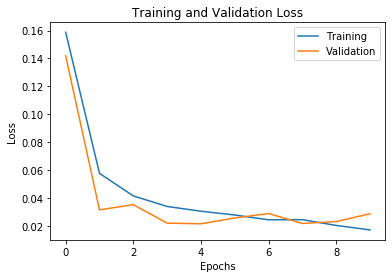

In [17]:
# Plotting the Loss curve of the Model
plt.figure()

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title("Training and Validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend(["Training", "Validation"], loc="upper right")

## Saving the Model

In [18]:
# # save the model to disk
# filename = "digit_model.pkl"  

# with open(filename, 'wb') as file:  
#     pickle.dump(model, file)
model.save('final_model.h5')

In [14]:
# Giving input to the model through WebCam

# Setting up the variables
width = 640
height = 480
threshold = 0.8

In [15]:
# Preprocessing the Image
def preProcessing(img):
    img = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    img = cv.equalizeHist(img)
    img = img /255
    return img

In [18]:
# Setting up the WebCam
cap = cv.VideoCapture(0)

cap.set(3, width)
cap.set(4, height)

# Unpickle the saved model
#pickle_in = open("model_trained.pkl", "rb")
#model = pickle.load(pickle_in)

# Giving input to the Model
while True:
    success, imgOriginal = cap.read()
    img = np.asarray(imgOriginal)
    img.astype(np.float32)
    img = cv.resize(img, (28, 28))
    
    img = preProcessing(img)
    cv.imshow("Processed Image", img)
    
    img = img.reshape(1, 28, 28, 1)
    
    
    # Predicting the class
    classIndex = int(model.predict_classes(img))
    #print(classIndex)
    
    prediction = model.predict(img)
    #print(prediction)
    
    probVal = np.amax(prediction)
    #print(probVal)
    
    if probVal > threshold:
        cv.putText(imgOriginal, str(classIndex) + " " +str(probVal), (50, 50), cv.FONT_HERSHEY_COMPLEX, 1, (0, 0, 255), 1)
        
    cv.imshow("Original Image", imgOriginal)
    
    
    
    # Statement to break from web cam
    if cv.waitKey(1) & 0xFF == ord('q'):
        break
        
# When everything done, release the capture
cap.release()
cv.destroyAllWindows()